In [122]:
import sklearn
import sklearn.datasets as ds
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [123]:
boston = ds.load_boston()
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)

In [124]:
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [125]:
print(df.columns.values)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d7507d6a0>]],
      dtype=object)

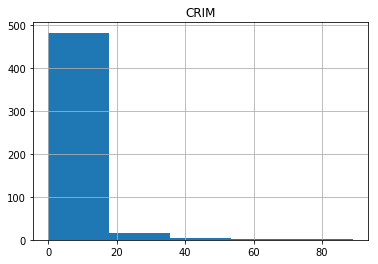

In [126]:
df.hist(column='CRIM', bins=5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d74d93da0>]],
      dtype=object)

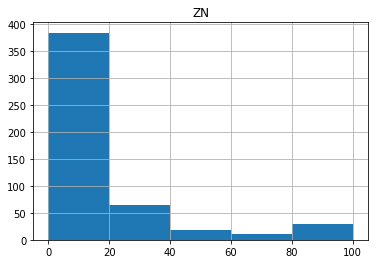

In [127]:
df.hist(column='ZN', bins=5)

In [128]:
df_target=pd.DataFrame(data=boston.target)
regression = LinearRegression().fit(df, df_target)
predictions = regression.predict(df)

In [129]:
print("Mean error: " + str(metrics.mean_absolute_error(predictions, df_target)))

Mean error: 3.272944637996935


In [130]:
# each column seperately
columns = {}
for col in df.columns.values:
    regression = LinearRegression().fit(df[col].values.reshape(-1,1), df_target)
    predictions = regression.predict(df[col].values.reshape(-1,1))
    columns[col] = metrics.mean_absolute_error(predictions, df_target)

In [131]:
print("Mean error by each column:")
for c in columns:
    print(c + ": " + str(columns[c]))

Mean error by each column:
CRIM: 6.140730668419351
ZN: 6.061931332922249
INDUS: 5.776538480249924
CHAS: 6.627895571611994
NOX: 5.971323159053393
RM: 4.4477729015322325
AGE: 5.984744717749342
DIS: 6.364831017913438
RAD: 6.1885812924226205
TAX: 5.875896392789662
PTRATIO: 5.7740823266895305
B: 6.206759155825603
LSTAT: 4.505281166250568
